In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
passengers = pd.read_csv('data/Annual_rainfall_eastern_USA_1817_1922.csv')
df = passengers.set_index('t').sort_index()

In [8]:
df.head()

,x
t,
1,22.54
2,-17.46
3,-26.46
4,11.54
5,6.54


<Axes: xlabel='t'>

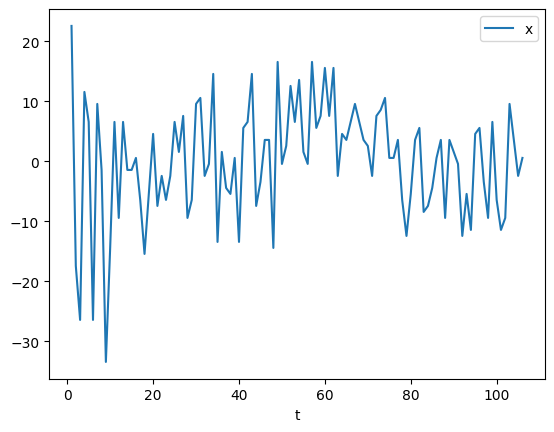

In [9]:
df.plot()

<h3>Разложения ряда на компоненты</h3>

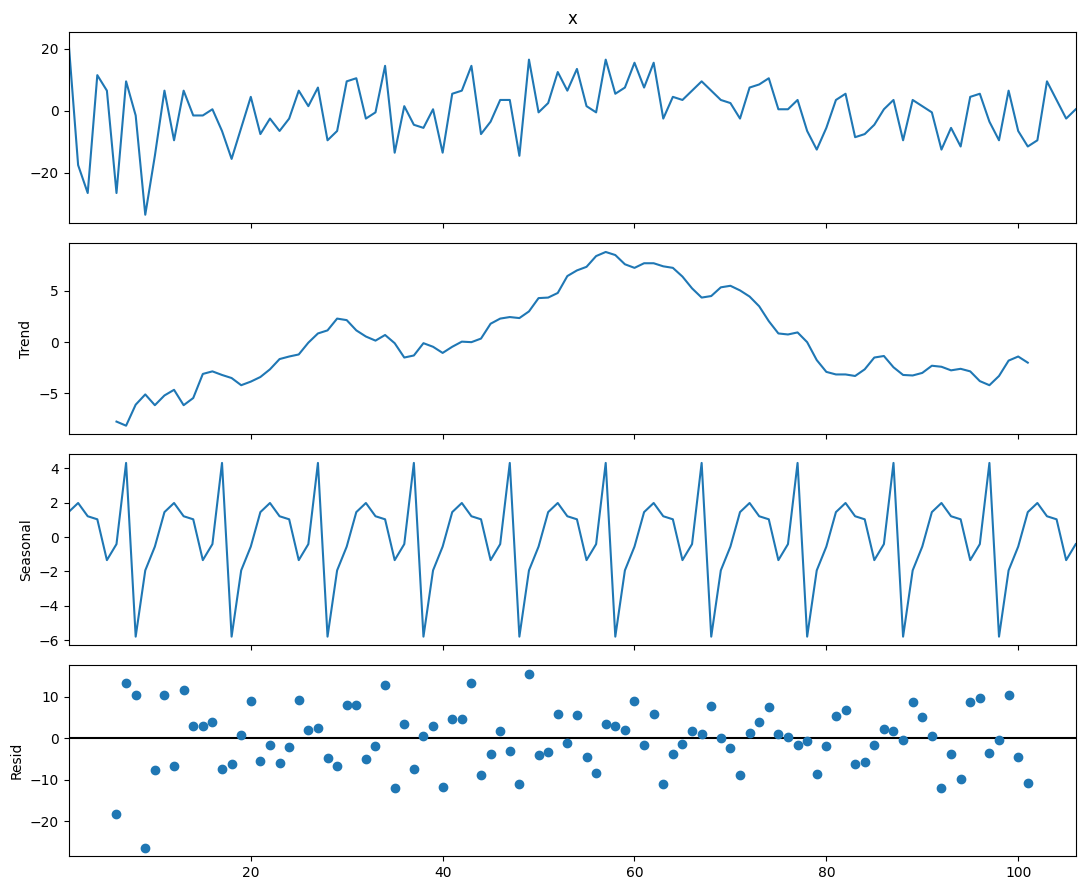

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(df['x'], period=10)
decompose.plot()
plt.show()


<h3>Аддитивная модель</h3>

<Axes: xlabel='t'>

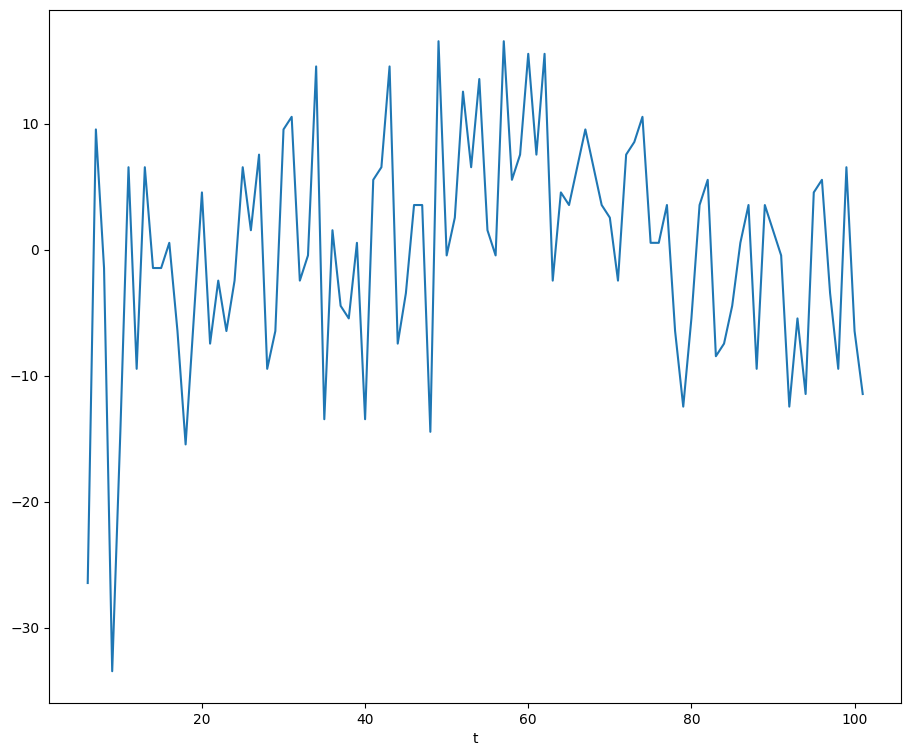

In [21]:
add_model = decompose.seasonal + decompose.trend + decompose.resid
add_model.plot()

<h3>Мультипликативная модель</h3>

<Axes: xlabel='t'>

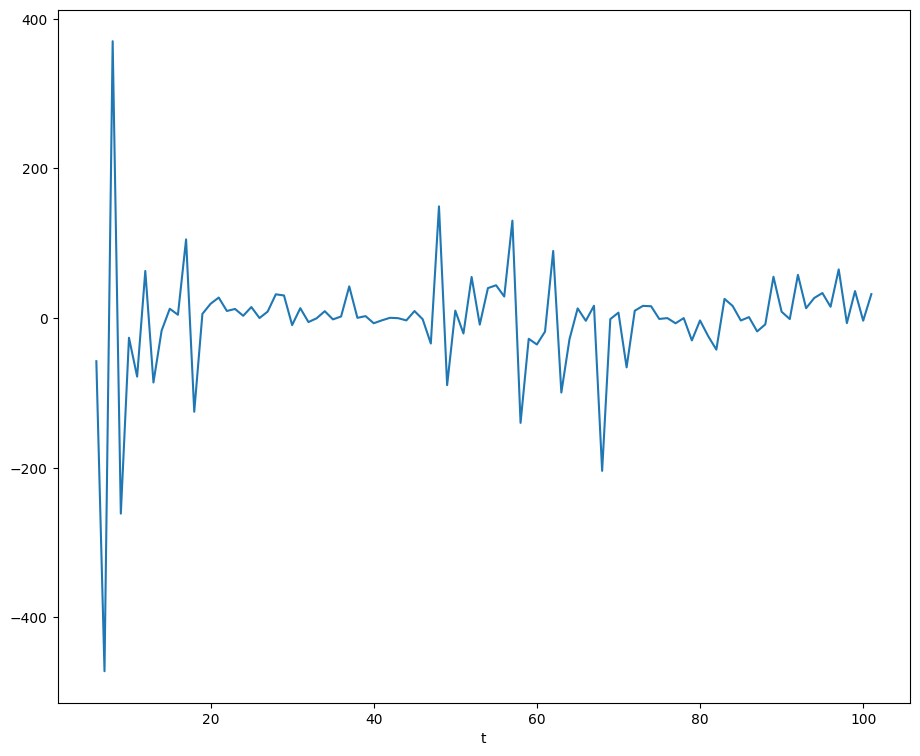

In [22]:
mlt_model = decompose.seasonal * decompose.trend * decompose.resid
mlt_model.plot()

<h3>Проверка на стационарность</h3>

In [5]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.05

print(f'Тест Дики-Фуллера ряда:')
dftest = adfuller(df, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда:
Test Statistic                -9.820696e+00
p-value                        5.347990e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


<h3>Автокорреляция</h3>

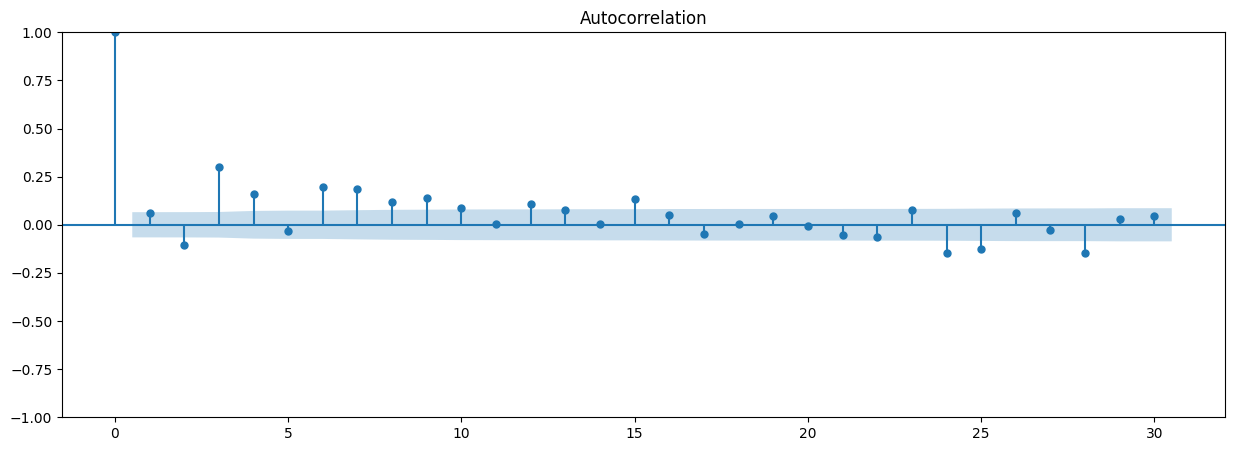

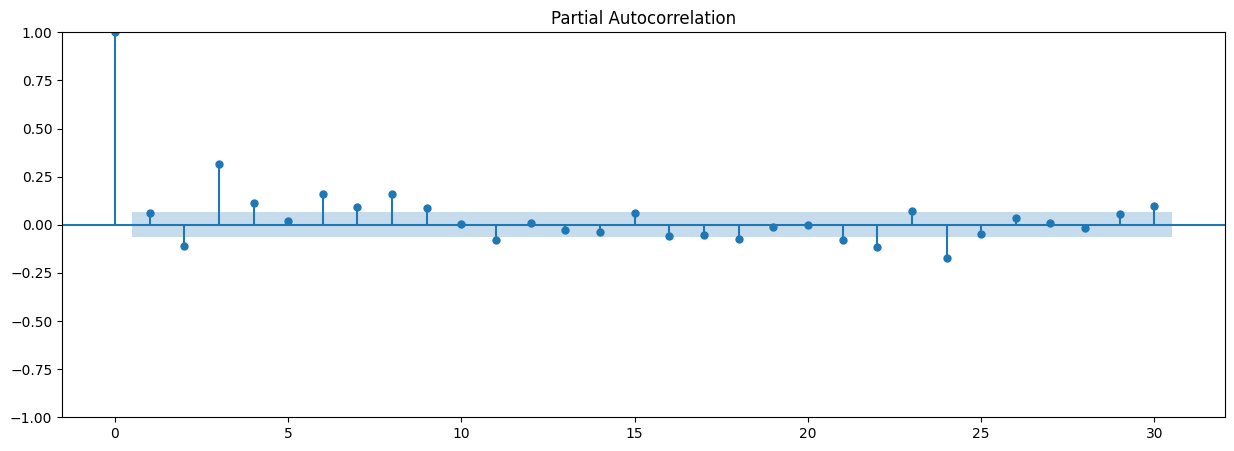

In [13]:
import statsmodels.tsa.api as smt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

ac_plot = smt.graphics.plot_acf(df, lags=30, alpha=0.5)

pac_plot = smt.graphics.plot_pacf(df, lags=30, alpha=0.5)